In [47]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [48]:
# import requirements
import os
import shap
import tensorflow as tf
from numpy import load
import numpy as np

In [49]:
basepath = "/content/drive/MyDrive/CV"
img_size = "96" # 96 for normal / 160 for large model

In [50]:
# load data
if img_size == "160":
    x_test = load(os.path.join(basepath, "data_test_160.npz"))['arr_0']
    x_train = load(os.path.join(basepath, "data_train_160.npz"))['arr_0']
    y_test = load(os.path.join(basepath, "labels_test.npz"))['arr_0']
    y_train = load(os.path.join(basepath, "labels_train.npz"))['arr_0']
elif img_size == "96":
    x_test = load(os.path.join(basepath, "sub_data_test_96.npz"))['arr_0']
    x_train = load(os.path.join(basepath, "sub_data_train_96.npz"))['arr_0']
    y_test = load(os.path.join(basepath, "sub_labels_test.npz"))['arr_0']
    y_train = load(os.path.join(basepath, "sub_labels_train.npz"))['arr_0']
print('Shape x_test: ', x_test.shape)
print('Shape x_train: ', x_train.shape)
print('Shape y_test: ', y_test.shape)
print('Shape y_train: ', y_train.shape)

Shape x_test:  (9000, 96, 96, 3)
Shape x_train:  (36000, 96, 96, 3)
Shape y_test:  (9000,)
Shape y_train:  (36000,)


In [51]:
# Label Names
classes =  np.unique(y_train)
class_labels = ["Tumor", "Stroma", "Complex", "Lympho", "Debris", "Mucosa", "Adipose", "Empty"]
mapping = dict(zip(classes, class_labels))

## 96 x 96 images


In [52]:
# load model
model = tf.keras.models.load_model("/content/drive/MyDrive/CV/model_imgsize_96_epochs_15_LR_0.0001_BS_32_time_02_10_2023_17_03_05_PretrainedMobileNetV2_Flatten_3Dense_l2.h5")

In [53]:
#define explainer
shap.initjs()

masker = shap.maskers.Image("inpaint_ns", x_train[0].shape)

explainer = shap.Explainer(model, masker, output_names=class_labels)

explainer

In [54]:
# calculate shape values
shap_values = explainer(x_test[:4], outputs=shap.Explanation.argsort.flip[:8])

shap_values.shape

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  25%|██▌       | 1/4 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  75%|███████▌  | 3/4 [00:20<00:04,  4.09s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer: 100%|██████████| 4/4 [00:27<00:00,  5.22s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer: 5it [00:35,  8.88s/it]


(4, 96, 96, 3, 8)

In [55]:
# predcit 4 random samles
print("Actual Labels    : {}".format([mapping[i] for i in y_test[:4]]))
probs = model.predict(x_test[:4])
print("Predicted Labels : {}".format([mapping[i+1] for i in np.argmax(probs, axis=1)]))
print("Probabilities : {}".format(np.max(probs, axis=1)))

Actual Labels    : ['Empty', 'Stroma', 'Adipose', 'Complex']
1/1 [==============================] - 1s 833ms/step
Predicted Labels : ['Empty', 'Complex', 'Adipose', 'Complex']
Probabilities : [0.9597923  0.42915484 0.8511656  0.4331398 ]


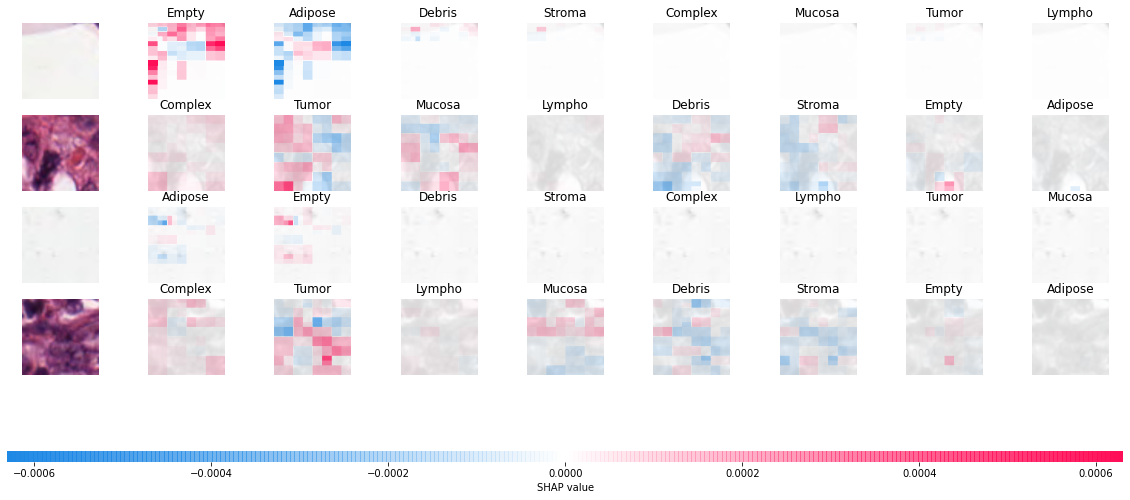

In [56]:
# plot shape values
shap.image_plot(shap_values)

## Test on Tumors



In [57]:
# create array only containing tumors

t_test = list()
t_label = list()
for i, (img, label) in enumerate(zip(x_test, y_test)):
  if label == 1:
    t_test.append(img)
    t_label.append(label)

t_test = np.array(t_test)
t_label = np.array(t_label)

In [58]:
# define explainer

shap.initjs()

masker = shap.maskers.Image("inpaint_ns", x_train[0].shape)

explainer = shap.Explainer(model, masker, output_names=class_labels)

explainer

In [59]:
# calculate shap values

shap_values = explainer(t_test[:10], outputs=shap.Explanation.argsort.flip[:8])

shap_values.shape

  0%|          | 0/498 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  20%|██        | 2/10 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  40%|████      | 4/10 [00:23<00:24,  4.05s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  50%|█████     | 5/10 [00:31<00:27,  5.54s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  60%|██████    | 6/10 [00:39<00:26,  6.63s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  70%|███████   | 7/10 [00:48<00:22,  7.38s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  80%|████████  | 8/10 [00:56<00:14,  7.37s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  90%|█████████ | 9/10 [01:04<00:07,  7.62s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer: 100%|██████████| 10/10 [01:13<00:00,  8.11s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer: 11it [01:23,  9.24s/it]


(10, 96, 96, 3, 8)

In [60]:
# predcit 10 samples

print("Actual Labels    : {}".format([mapping[i] for i in t_label[:10]]))
probs = model.predict(t_test[:10])
print("Predicted Labels : {}".format([mapping[i+1] for i in np.argmax(probs, axis=1)]))
print("Probabilities : {}".format(np.max(probs, axis=1)))

Actual Labels    : ['Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor']
1/1 [==============================] - 0s 26ms/step
Predicted Labels : ['Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Lympho']
Probabilities : [0.76563627 0.8130509  0.47417757 0.79872775 0.9658441  0.98321414
 0.4075834  0.70177734 0.62771267 0.84255195]


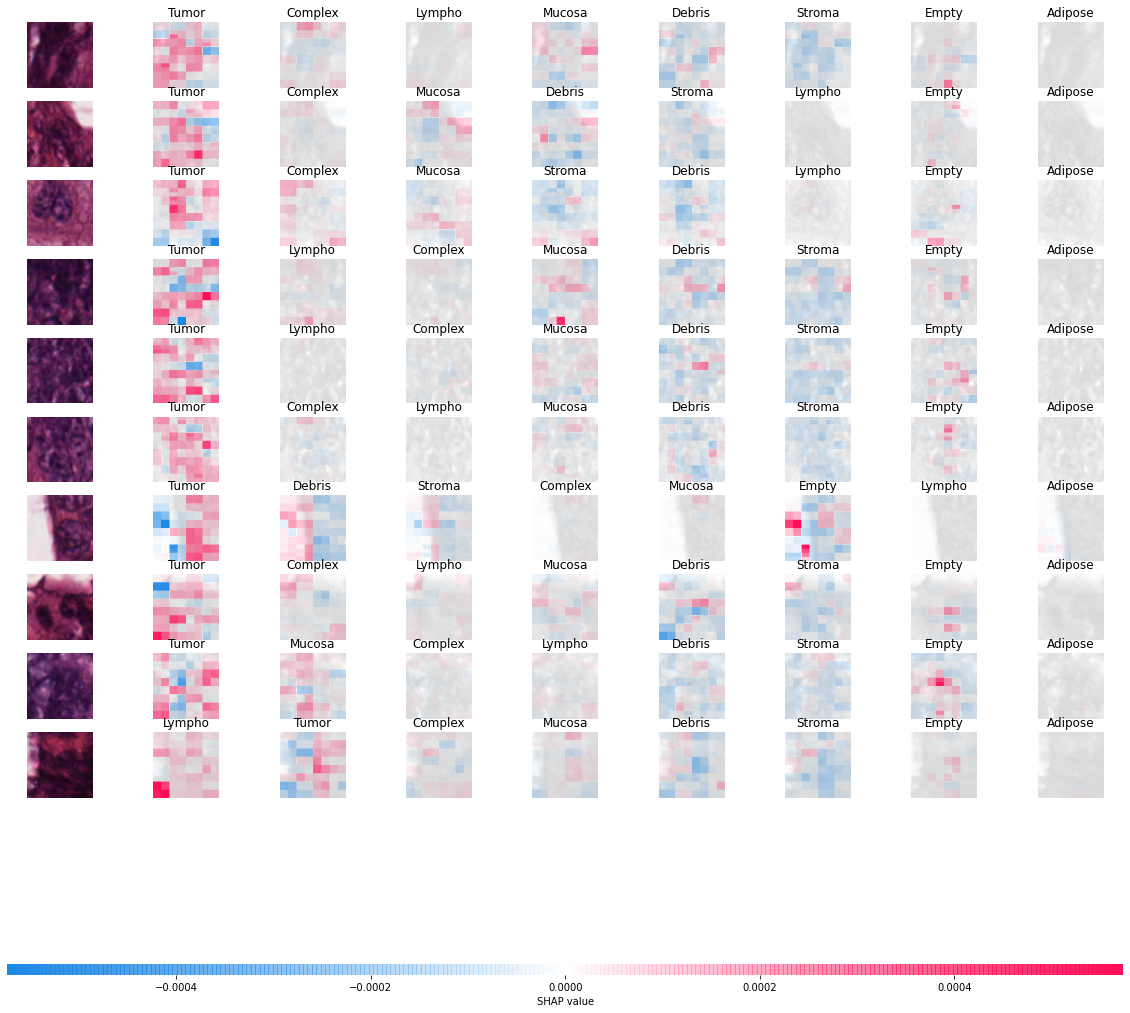

In [61]:
# plot shap values

shap.image_plot(shap_values)

## 160x160 images

In [62]:
# load model

model_large = tf.keras.models.load_model("/content/drive/MyDrive/CV/model_imgsize_160_epochs_15_LR_0.0001_BS_32_time_02_10_2023_17_36_04_PretrainedMobileNetV2_Flatten_3Dense_l2.h5")

In [63]:
basepath = "/content/drive/MyDrive/CV"
img_size = "160" # 96 for normal / 160 for large model

In [64]:
# load data
if img_size == "160":
    x_test = load(os.path.join(basepath, "data_test_160.npz"))['arr_0']
    x_train = load(os.path.join(basepath, "data_train_160.npz"))['arr_0']
    y_test = load(os.path.join(basepath, "labels_test.npz"))['arr_0']
    y_train = load(os.path.join(basepath, "labels_train.npz"))['arr_0']
elif img_size == "96":
    x_test = load(os.path.join(basepath, "sub_data_test_96.npz"))['arr_0']
    x_train = load(os.path.join(basepath, "sub_data_train_96.npz"))['arr_0']
    y_test = load(os.path.join(basepath, "sub_labels_test.npz"))['arr_0']
    y_train = load(os.path.join(basepath, "sub_labels_train.npz"))['arr_0']
print('Shape x_test: ', x_test.shape)
print('Shape x_train: ', x_train.shape)
print('Shape y_test: ', y_test.shape)
print('Shape y_train: ', y_train.shape)

Shape x_test:  (1000, 160, 160, 3)
Shape x_train:  (4000, 160, 160, 3)
Shape y_test:  (1000,)
Shape y_train:  (4000,)


In [65]:
# create array only containing tumors

t_test = list()
t_label = list()
for i, (img, label) in enumerate(zip(x_test, y_test)):
  if label == 1:
    t_test.append(img)
    t_label.append(label)

t_test = np.array(t_test)
t_label = np.array(t_label)

In [66]:
# define explainer

shap.initjs()

masker = shap.maskers.Image("inpaint_ns", x_train[0].shape)

explainer = shap.Explainer(model_large, masker, output_names=class_labels)

explainer

In [67]:
# calcualte shap values

shap_values = explainer(t_test[:10], outputs=shap.Explanation.argsort.flip[:8])

shap_values.shape

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  10%|█         | 1/10 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  30%|███       | 3/10 [00:30<00:53,  7.60s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  40%|████      | 4/10 [00:45<01:03, 10.56s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  50%|█████     | 5/10 [01:00<01:00, 12.20s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  60%|██████    | 6/10 [01:15<00:53, 13.45s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  70%|███████   | 7/10 [01:29<00:40, 13.66s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  80%|████████  | 8/10 [01:46<00:28, 14.47s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  90%|█████████ | 9/10 [02:00<00:14, 14.39s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer: 100%|██████████| 10/10 [02:14<00:00, 14.43s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer: 11it [02:30, 15.10s/it]


(10, 160, 160, 3, 8)

In [68]:
# predcit 10 samples

print("Actual Labels    : {}".format([mapping[i] for i in t_label[:10]]))
probs = model_large.predict(t_test[:10])
print("Predicted Labels : {}".format([mapping[i+1] for i in np.argmax(probs, axis=1)]))
print("Probabilities : {}".format(np.max(probs, axis=1)))

Actual Labels    : ['Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor']


1/1 [==============================] - 1s 867ms/step
Predicted Labels : ['Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor']
Probabilities : [0.9955266  0.91013896 0.942054   0.712509   0.912526   0.5365191
 0.9997702  0.8906297  0.8744145  0.9651569 ]


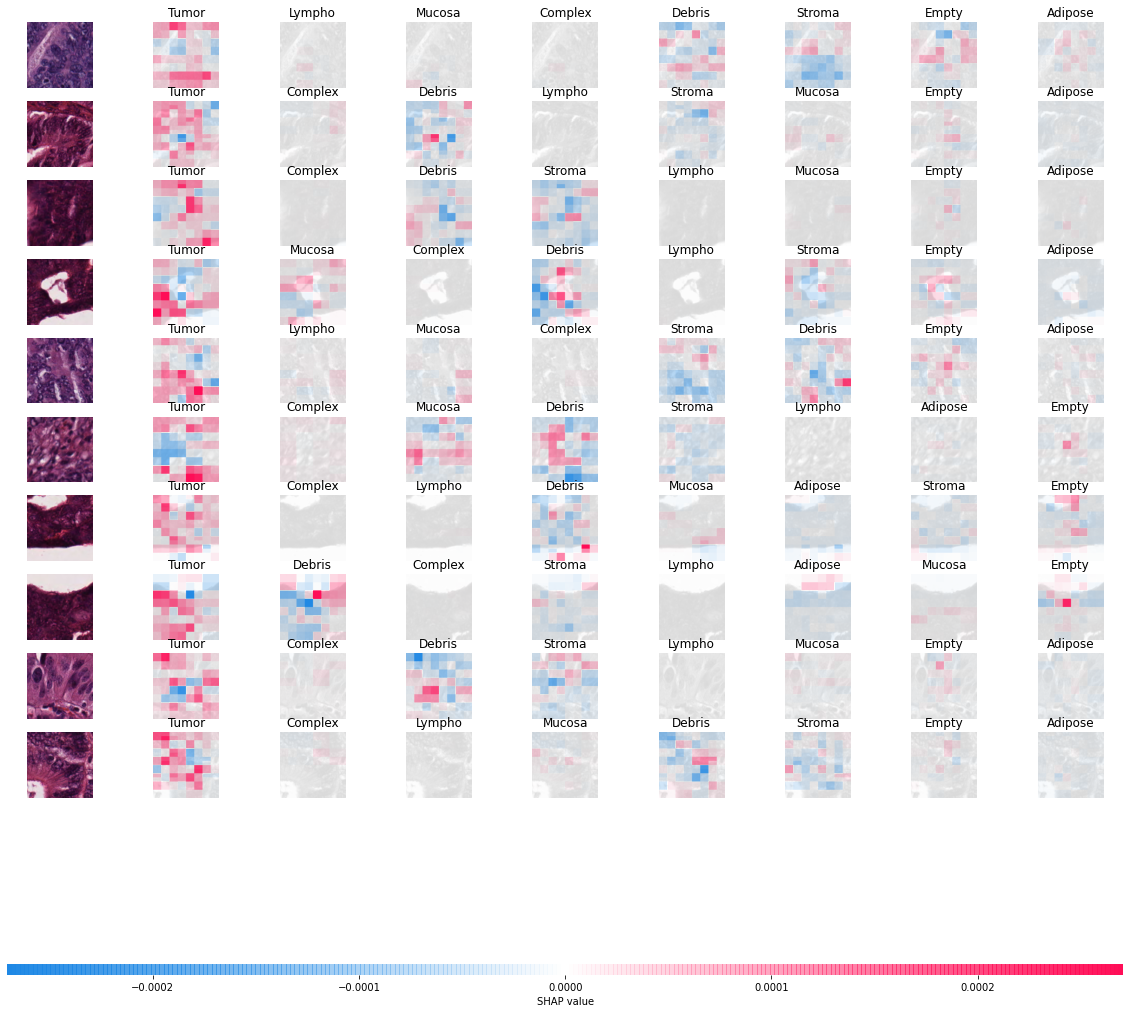

In [69]:
shap.image_plot(shap_values)

### inpaint_telea masker

In [ ]:
# define explainer

shap.initjs()

masker = shap.maskers.Image("inpaint_telea", x_train[0].shape)

explainer = shap.Explainer(model_large, masker, output_names=class_labels)

explainer

In [72]:
# calcualte shap values

shap_values = explainer(t_test[:10], outputs=shap.Explanation.argsort.flip[:8])

shap_values.shape

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  10%|█         | 1/10 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  30%|███       | 3/10 [00:31<00:51,  7.34s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  40%|████      | 4/10 [00:46<01:02, 10.43s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  50%|█████     | 5/10 [01:00<00:58, 11.74s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  60%|██████    | 6/10 [01:15<00:50, 12.70s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  70%|███████   | 7/10 [01:28<00:38, 12.76s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  80%|████████  | 8/10 [01:43<00:27, 13.59s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  90%|█████████ | 9/10 [01:57<00:13, 13.75s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer: 100%|██████████| 10/10 [02:10<00:00, 13.66s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer: 11it [02:25, 14.57s/it]


(10, 160, 160, 3, 8)

In [73]:
# predcit 10 samples

print("Actual Labels    : {}".format([mapping[i] for i in t_label[:10]]))
probs = model_large.predict(t_test[:10])
print("Predicted Labels : {}".format([mapping[i+1] for i in np.argmax(probs, axis=1)]))
print("Probabilities : {}".format(np.max(probs, axis=1)))

Actual Labels    : ['Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor']
1/1 [==============================] - 0s 46ms/step
Predicted Labels : ['Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor']
Probabilities : [0.9955266  0.91013896 0.942054   0.712509   0.912526   0.5365191
 0.9997702  0.8906297  0.8744145  0.9651569 ]


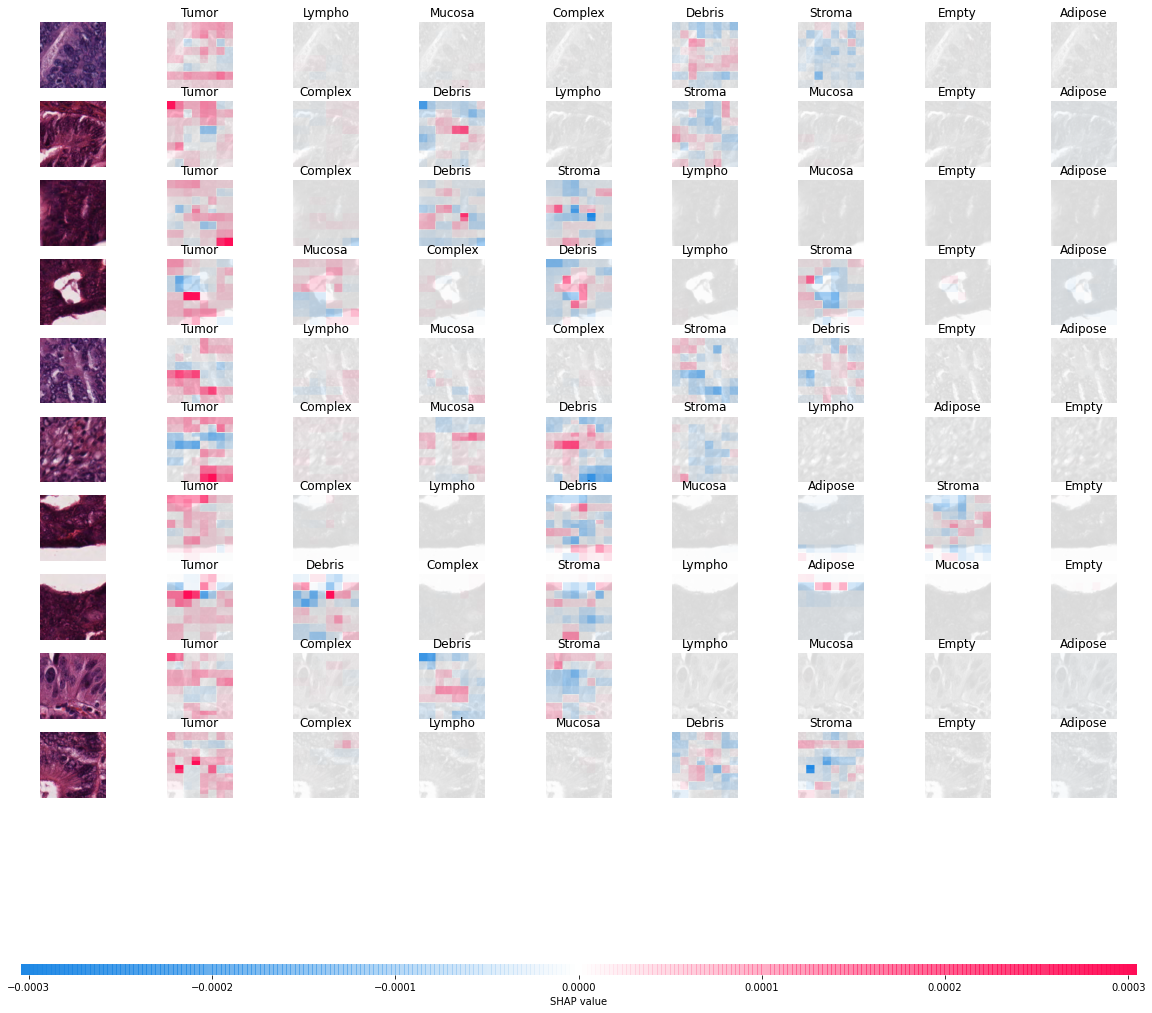

In [74]:
shap.image_plot(shap_values)